## Import Dependencies for Cleaning Data & Building Charts

In [1]:
#Import dependencies 
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

## Adding in the Data

In [2]:
#Read in data files
filepath = os.path.join('resources', 'WDIData.csv')
wdi_data_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources', 'indicator_df.csv')
indicator_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources','HDI_df.csv')
hdi_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_education-index.csv')
edu_index_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_gender-inequality-index.csv')
gii_df = pd.read_csv(filepath)

filepath= os.path.join('resources', 'WDISeries.csv')
series_df = pd.read_csv(filepath, header=0)

## Cleaning the Data
### Datasets included:
 - The World Bank's World Development Indicators Data
 - United Nations Development Program Human Development Reports
   - Human Development Index
   - Education Index
   - Gender

In [3]:
#Pull all in all indicicators from 1990-2019
full_ind_1990_2019 = wdi_data_df[["Country Name","Country Code","Indicator Name","Indicator Code",
                                  "1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                  "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                  "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]]

In [4]:
#Reformat years from columns to rows
full_ind_reformatted = pd.melt(full_ind_1990_2019, id_vars =["Country Name","Country Code","Indicator Name","Indicator Code"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]) 

In [5]:
#Drop all NaN from full 1990-2019 dataset 
ind_nan_dropped = full_ind_reformatted.dropna()
ind_nan_dropped_renamed = ind_nan_dropped.rename(columns={"Country Name":"country_name","Country Code":"country_code","Indicator Name":"indicator_name","Indicator Code":"indicator_code","variable":"year"})

In [6]:
#Read in indicator topic data
code_topics_df = series_df[["Series Code","Topic"]]
code_topics_renamed = code_topics_df.rename(columns={"Series Code":"series_code","Topic":"topic"})

In [7]:
#Merge indicators and topics
indicators_and_topics = pd.merge(ind_nan_dropped_renamed, code_topics_renamed, left_on = ["indicator_code"], right_on=["series_code"])
indicators_and_topics.head()

,country_name,country_code,indicator_name,indicator_code,year,value,series_code,topic
0,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,1642.330558,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
1,Caribbean small states,CSS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2346.020996,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
2,Early-demographic dividend,EAR,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,733.593753,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
3,East Asia & Pacific,EAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2112.948079,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
4,East Asia & Pacific (excluding high income),EAP,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,347.860363,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...


In [8]:
#Reformat the HDI dataframe
hdi_reformatted = pd.melt(hdi_df, id_vars =["Country"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018"]) 
hdi_reformatted.head()

,Country,variable,value
0,Afghanistan,1990,0.298
1,Albania,1990,0.644
2,Algeria,1990,0.578
3,Andorra,1990,..
4,Angola,1990,..


In [9]:
#Merge primary indicators and HDI
indicators_hdi = pd.merge(indicators_and_topics, hdi_reformatted, left_on = ["country_name", "year"], right_on=["Country", "variable"])
indicators_hdi.head()

,country_name,country_code,indicator_name,indicator_code,year,value_x,series_code,topic,Country,variable,value_y
0,Albania,ALB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,519.629707,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,Albania,1990,0.644
1,Albania,ALB,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,10.510775,NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,Albania,1990,0.644
2,Albania,ALB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,17.776600,SP.ADO.TFRT,Health: Reproductive health,Albania,1990,0.644
3,Albania,ALB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,61.994909,SP.POP.DPND,Health: Population: Dynamics,Albania,1990,0.644
4,Albania,ALB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,8.901594,SP.POP.DPND.OL,Health: Population: Dynamics,Albania,1990,0.644


In [10]:
indicators_hdi_dropped = indicators_hdi.drop(["series_code","Country", "variable"], axis=1)
indicators_hdi_renamed = indicators_hdi_dropped.rename(columns={"value_x":"value","value_y":"hdi"})
indicators_hdi_renamed["category"] = indicators_hdi_renamed["topic"].str.split(':').str[0]
indicators_hdi_renamed["subcategory"] = indicators_hdi_renamed["topic"].str.split(':').str[1]
indicators_hdi_renamed.head()

,country_name,country_code,indicator_name,indicator_code,year,value,topic,hdi,category,subcategory
0,Albania,ALB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,519.629707,Economic Policy & Debt: National accounts: Adj...,0.644,Economic Policy & Debt,National accounts
1,Albania,ALB,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,10.510775,Economic Policy & Debt: National accounts: Adj...,0.644,Economic Policy & Debt,National accounts
2,Albania,ALB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,17.776600,Health: Reproductive health,0.644,Health,Reproductive health
3,Albania,ALB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,61.994909,Health: Population: Dynamics,0.644,Health,Population
4,Albania,ALB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,8.901594,Health: Population: Dynamics,0.644,Health,Population


In [11]:
twb_wdi_indicators_final = indicators_hdi_renamed[["country_name","country_code","indicator_name","indicator_code","topic","category","subcategory","year","value","hdi"]]
twb_wdi_indicators_final.head()

,country_name,country_code,indicator_name,indicator_code,topic,category,subcategory,year,value,hdi
0,Albania,ALB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,519.629707,0.644
1,Albania,ALB,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,10.510775,0.644
2,Albania,ALB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Health: Reproductive health,Health,Reproductive health,1990,17.776600,0.644
3,Albania,ALB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,Health: Population: Dynamics,Health,Population,1990,61.994909,0.644
4,Albania,ALB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Health: Population: Dynamics,Health,Population,1990,8.901594,0.644


In [12]:
#Pull out just the WDI values
wdi_values = twb_wdi_indicators_final[["country_name","indicator_name","year","value","hdi"]]
wdi_values.head()

,country_name,indicator_name,year,value,hdi
0,Albania,Adjusted net national income per capita (curre...,1990,519.629707,0.644
1,Albania,Adjusted savings: net national savings (% of GNI),1990,10.510775,0.644
2,Albania,"Adolescent fertility rate (births per 1,000 wo...",1990,17.776600,0.644
3,Albania,Age dependency ratio (% of working-age populat...,1990,61.994909,0.644
4,Albania,"Age dependency ratio, old (% of working-age po...",1990,8.901594,0.644


In [13]:
#Select the relevent columns from the Gender Inequality Index dataframe
gii_2014_2018 = gii_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
gii_2014_2018["indicator_name"] = "Gender Inequality Index"

#Pull out space from Country column values
gii_2014_2018["country_name"] = gii_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Pivot years
gii_2014_2018_pivot = pd.melt(gii_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [15]:
#Add in HDI
gii_hdi_combined = pd.merge(gii_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [16]:
#Rename columns
gii_hdi_renamed = gii_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
gii_hdi = gii_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
gii_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Gender Inequality Index,2014,0.623,0.488
1,Albania,Gender Inequality Index,2014,0.261,0.787
2,Algeria,Gender Inequality Index,2014,0.439,0.749
3,Angola,Gender Inequality Index,2014,0.577,0.557
4,Argentina,Gender Inequality Index,2014,0.365,0.825


In [17]:
#Select the relevent columns from the Gender Inequality Index dataframe
ei_2014_2018 = edu_index_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
ei_2014_2018["indicator_name"] = "Education Index"

#Pull out space from Country column values
ei_2014_2018["country_name"] = ei_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#Pivot years
ei_2014_2018_pivot = pd.melt(ei_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [19]:
#Add in HDI
ei_hdi_combined = pd.merge(ei_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [20]:
#Rename columns
ei_hdi_renamed = ei_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
ei_hdi = ei_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
ei_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Education Index,2014,0.403,0.488
1,Albania,Education Index,2014,0.774,0.787
2,Algeria,Education Index,2014,0.662,0.749
3,Andorra,Education Index,2014,0.715,0.853
4,Angola,Education Index,2014,0.46,0.557


In [21]:
#Create combined indicators dataframe from both WDI and UNDP datasets
all_indicators = [wdi_values, gii_hdi, ei_hdi]
combined_indicators = pd.concat(all_indicators)

#Drop ".." rows
dropped_non_float = combined_indicators[combined_indicators.value != ".."]
dropped_non_float = dropped_non_float[dropped_non_float.hdi != ".."]

#Asign value and hdi columns as floats
dropped_non_float["value"] = dropped_non_float["value"].astype(float)
dropped_non_float["hdi"] = dropped_non_float["hdi"].astype(float)
dropped_non_float.head()

,country_name,indicator_name,year,value,hdi
0,Albania,Adjusted net national income per capita (curre...,1990,519.629707,0.644
1,Albania,Adjusted savings: net national savings (% of GNI),1990,10.510775,0.644
2,Albania,"Adolescent fertility rate (births per 1,000 wo...",1990,17.776600,0.644
3,Albania,Age dependency ratio (% of working-age populat...,1990,61.994909,0.644
4,Albania,"Age dependency ratio, old (% of working-age po...",1990,8.901594,0.644


In [22]:
combined_indicators_final = dropped_non_float
combined_indicators_final.dtypes

country_name       object
indicator_name     object
year               object
value             float64
hdi               float64
dtype: object

## Working with Primary Indicators 
Indicators tracked by the most countries over the most years

In [23]:
#Pull out primary indicators for initial charts
primary_indicators = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Population, total",
                                        "Agriculture, forestry, and fishing, value added (% of GDP)",
                                        "Life expectancy at birth, total (years)",
                                        "GDP (current US$)",
                                        "Employers, total (% of total employment) (modeled ILO estimate)"]) ]
primary_indicators.head()

,country_name,indicator_name,year,value,hdi
74,Albania,GDP (current US$),1990,2.028554e+09,0.644
126,Albania,"Life expectancy at birth, total (years)",1990,7.183600e+01,0.644
263,Albania,"Population, total",1990,3.286542e+06,0.644
597,Algeria,GDP (current US$),1990,6.204510e+10,0.578
656,Algeria,"Life expectancy at birth, total (years)",1990,6.693800e+01,0.578


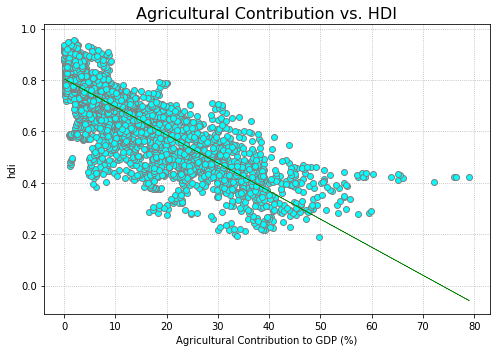

0.6717399625615024


In [24]:
#Create Agricultural v. HDI chart

agri_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Agriculture, forestry, and fishing, value added (% of GDP)')]

# defining variables
x = agri_values['value']
y = agri_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Agricultural Contribution to GDP (%)')
plt.ylabel('hdi')
plt.title("Agricultural Contribution vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Agriculture_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


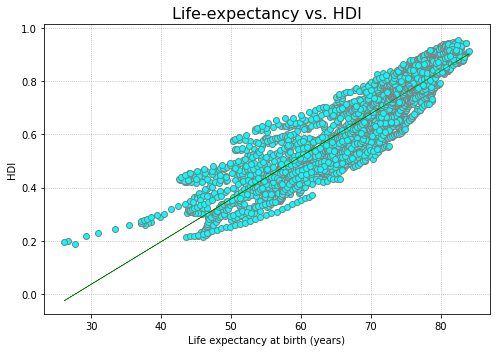

0.8344679080170055


In [25]:
#Create Life Expectancy v. HDI chart

life_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Life expectancy at birth, total (years)')]

# defining variables
x = life_values['value']
y = life_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('HDI')
plt.title("Life-expectancy vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Life-expectancy_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

In [ ]:
#Create GDP v. HDI chart

gdp_values = primary_indicators.loc[(primary_indicators['indicator_name']=='GDP (current US$)')]

# defining variables
x = gdp_values['value']
y = gdp_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('GDP (US $)')
plt.ylabel('HDI')
plt.title("Gross Domestic Product vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'GDP_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

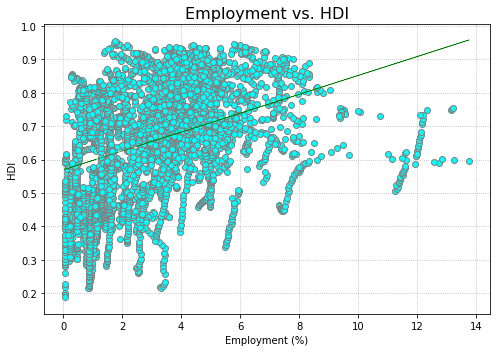

0.14140347304728104


In [26]:
#Create Employment v. HDI chart

employment_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Employers, total (% of total employment) (modeled ILO estimate)')]

# defining variables
x = employment_values['value']
y = employment_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Employment (%)')
plt.ylabel('HDI')
plt.title("Employment vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Employment_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

## Working with Secondary Indicators

In [27]:
#Pull out primary indicators for initial charts
secondary_indicators = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Education Index",
                                        "Gender Inequality Index",
                                        "Mobile cellular subscriptions (per 100 people)",
                                        "Access to electricity (% of population)",
                                        "Renewable electricity output (% of total electricity output)",
                                        "CO2 emissions (metric tons per capita)",
                                        "Labor force, female (% of total labor force)",
                                        "Unemployment, female (% of female labor force) (modeled ILO estimate)"]) ]
secondary_indicators.head()

,country_name,indicator_name,year,value,hdi
29,Albania,CO2 emissions (metric tons per capita),1990,1.678107,0.644
119,Albania,"Labor force, female (% of total labor force)",1990,40.975980,0.644
159,Albania,Mobile cellular subscriptions (per 100 people),1990,0.000000,0.644
275,Albania,Renewable electricity output (% of total elect...,1990,86.407767,0.644
353,Albania,Access to electricity (% of population),1990,100.000000,0.644


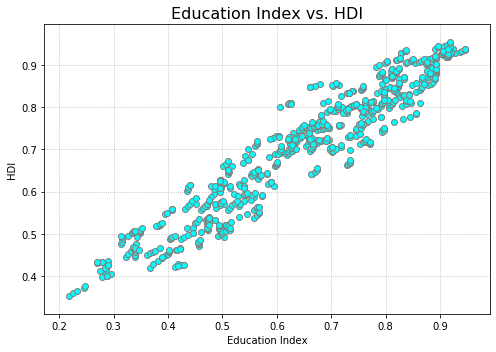

nan


In [28]:
#Create Education Index v. HDI chart

edu_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Education Index')]

# defining variables
x = edu_values['value']
y = edu_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Education Index')
plt.ylabel('HDI')
plt.title("Education Index vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Education_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

In [ ]:
#Create Gender Inequality Index v. HDI chart

gii_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Gender Inequality Index')]

# defining variables
x = gii_values['value']
y = gii_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Gender Inequality Index')
plt.ylabel('HDI')
plt.title("Gender Inequality Index vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'GII_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


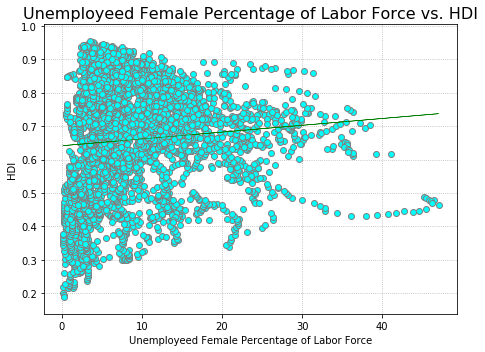

0.007887435987983612


In [29]:

#Create Female Unemployment v. HDI chart

female_unemp_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)')]

# defining variables
x = female_unemp_values['value']
y = female_unemp_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Unemployeed Female Percentage of Labor Force')
plt.ylabel('HDI')
plt.title("Unemployeed Female Percentage of Labor Force vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Female_Unemployment_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


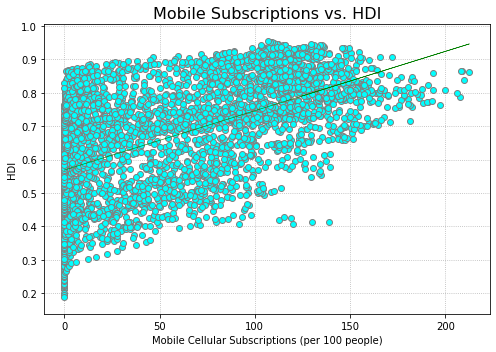

0.30420983418331277


In [30]:
#Create Mobile Subscriptions v. HDI chart

mobile_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Mobile cellular subscriptions (per 100 people)')]

# defining variables
x = mobile_values['value']
y = mobile_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Mobile Cellular Subscriptions (per 100 people)')
plt.ylabel('HDI')
plt.title("Mobile Subscriptions vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Mobile_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

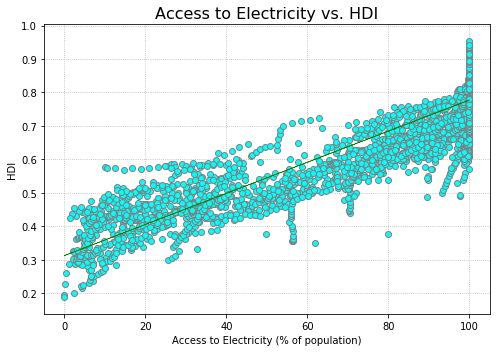

0.7767587502864063


In [31]:
#Create Access to Electricity v. HDI chart

electric_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Access to electricity (% of population)')]

# defining variables
x = electric_values['value']
y = electric_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Access to Electricity (% of population)')
plt.ylabel('HDI')
plt.title("Access to Electricity vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Electric_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

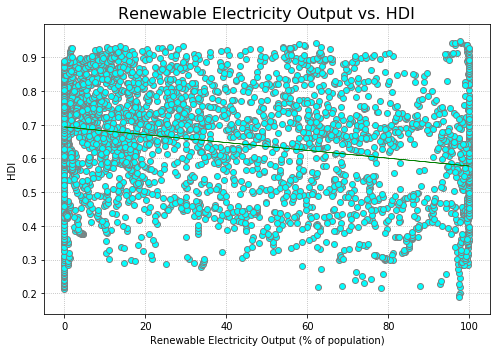

0.056397471826507235


In [32]:
#Create Renewable Electricity v. HDI chart

renewable_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Renewable electricity output (% of total electricity output)')]

# defining variables
x = renewable_values['value']
y = renewable_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Renewable Electricity Output (% of population)')
plt.ylabel('HDI')
plt.title("Renewable Electricity Output vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Renewable_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

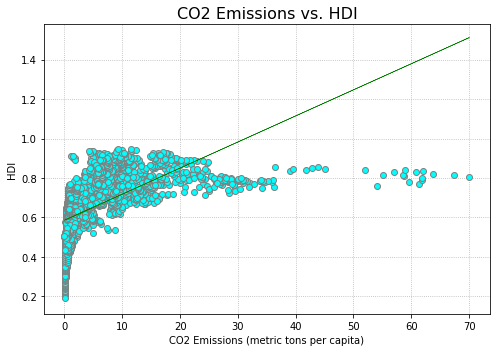

0.3056982843597935


In [33]:
#Create CO2 Emissions v. HDI chart

co2_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='CO2 emissions (metric tons per capita)')]

# defining variables
x = co2_values['value']
y = co2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('HDI')
plt.title("CO2 Emissions vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'CO2_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)